<a href="https://colab.research.google.com/github/sarojsahu123/EDA-on-Play-Store-App-Review/blob/main/Play_Store_App_Review_Analysis_Capstone_Project_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [43]:
#importing required modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

In [44]:
#importing and mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
#Let's access the data set
path='/content/drive/MyDrive/Play Store App Review Analysis-Saroj Sahu/'
df=pd.read_csv(path + 'Play Store Data.csv')

In [46]:
df_copy=df.copy() #creating a copy to make our original data set safe and unmodified that may be used further

In [47]:
#Exploring the Data
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# **Let's Understand the Data set**

Our Data set has the records of the App present in Play Store.Each row/entry gives details about a single individual App.

In [48]:
#Let's fetch the columns
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

**Exploring the columns**
1.   **'App'**-Name of the App
2.   **'Category'**-To which category the app belongs(Type of App)
1.   **'Rating'**-Rating of the App in Play Store
2.   **'Reviews'**-Number of users gives their reviews on the App(obviously after installing tha App)
1.   **'Size'**-size of the App(In MB/GB/KB...)
2.   **'Installs'**-How many installation of the App from Play Store
1.   **'Type'**-App is Free or Paid
2.   **'Price'**-Price of The App
1.   **'Content Rating'**-A type of Categorical Rating of the App to say to which age group it's recommended.
2.   **'Genres'**-Movie belongs to which Genre.(A subset of Category)
1.   **'Last Updated'**-Last update Date of the App
2.   **'Current Ver'**-Cerrent Version of the App
1.   **'Android Ver'**-Minimum android version required to support the App


















Some Information regarding the DataFrame 

In [49]:
df.shape

(10841, 13)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [51]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


# Let's start some **Data Cleaning**

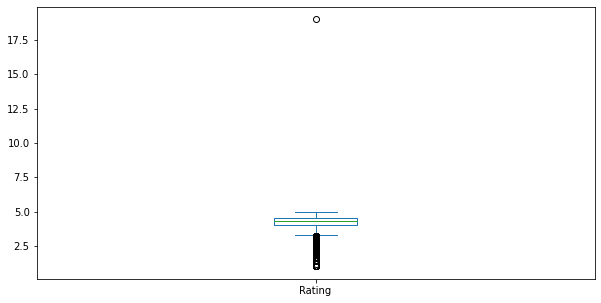

In [52]:
plt.rcParams['figure.figsize']=(10,5)
df.plot(kind='box');

There is one outlier which out of the rating range.So have to remove from the Dataset.

In [53]:
df[df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [54]:
df.drop(df[df['Rating']>5].index,axis=0,inplace=True)

In [55]:
df[(df['Rating']>5) | (df['Rating']<0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Now No outlier in Data set

In [56]:
#ckecking for duplicate Entries
df[df.duplicated(keep='first')]    # Selecting duplicate rows except first

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [57]:
#Deleting the duplicate entries
df.drop_duplicates(subset=['App'],keep='first',inplace=True)  # Deleting duplicate rows except first

Now no duplicate entries in the Data set

In [58]:
df.shape

(9659, 13)

In [59]:
#Check for the NULL values in our Dataset
df.isna().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

'Rating' column has highest number of NULL values,i.e.:1463

In [60]:
df['Rating'].fillna(df['Rating'].mean(),inplace=True)

In [61]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

Type ,Current Ver ,Android Ver columns have certain numbers of null values.Let's replace them with the values that are repeated for maximum times in that column.

In [62]:
print(df['Android Ver'].mode().values)
print(df['Current Ver'].mode().values)
print(df['Android Ver'].mode().values)

['4.1 and up']
['Varies with device']
['4.1 and up']


In [63]:
df['Type'].fillna(str(df['Type'].mode().values[0]),inplace=True)
df['Current Ver'].fillna(str(df['Current Ver'].mode().values[0]),inplace=True)
df['Android Ver'].fillna(str(df['Android Ver'].mode().values[0]),inplace=True)

In [64]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Now there is no NULL value in our Data set.

In [65]:
#we dropped some of the rows in our Data set,so reset the index of our DataFrame
df.reset_index(drop=True,inplace=True)

# Data Manipulation

In [66]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In the data set some column to be converted into numeric form for some logical and comparision operations.

In [67]:
df['Reviews']=df['Reviews'].astype('int')  #Reviews column was in other datatype format,Now it's is integer form.

In [68]:
def convert_Installs_to_numeric(installs): #Function that convert all values in 'Installs' column to Integer Format
  if '+' in installs:                      #As values in 'Installs' column are in string format
    installs=installs.replace('+','')
  if ',' in installs:
    installs=installs.replace(',','')
  return int(installs)  

In [69]:
df['Installs']=df['Installs'].apply(convert_Installs_to_numeric)

In [70]:
def convert_price_to_numeric(price):  #Values in 'Price' column are in string format so converting to numeric form   
  if '$' in price:
    price=price.replace('$','')
  if ',' in price:
    price=price.replace(',','')
  return float(price)

In [71]:
df['Price']=df['Price'].apply(convert_price_to_numeric)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          9659 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            9659 non-null   object 
 5   Installs        9659 non-null   int64  
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9659 non-null   object 
 12  Android Ver     9659 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 981.1+ KB


In [73]:
df.describe()

,Rating,Reviews,Installs,Price
count,9659.000000,9.659000e+03,9.659000e+03,9659.000000
mean,4.173243,2.165926e+05,7.777507e+06,1.099299
std,0.494312,1.831320e+06,5.375828e+07,16.852152
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,1.000000e+03,0.000000
50%,4.200000,9.670000e+02,1.000000e+05,0.000000
75%,4.500000,2.940100e+04,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


Now in the DataFrame,there is required Numeric columns that can be used for better and error less Data analysis.

# **DATA ANALYSIS AND VISUALIZATION**

Let's analyse the Data to find the key factors responsible for App success and try to get some insight results that can be benificiary for the organization and better selection of App to develop.

In [74]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [75]:
category_genre_App_volume=df.groupby(['Category','Genres'])['App'].count()
category_genre_App_volume

Category           Genres                               
ART_AND_DESIGN     Art & Design                              57
                   Art & Design;Action & Adventure            1
                   Art & Design;Creativity                    5
                   Art & Design;Pretend Play                  1
AUTO_AND_VEHICLES  Auto & Vehicles                           85
                                                           ... 
TRAVEL_AND_LOCAL   Travel & Local                           218
                   Travel & Local;Action & Adventure          1
VIDEO_PLAYERS      Video Players & Editors                  162
                   Video Players & Editors;Music & Video      1
WEATHER            Weather                                   79
Name: App, Length: 145, dtype: int64

# Finding category wise Apps volume present in Play Store

In [76]:
category_wise_App_volume=df['Category'].value_counts()
category_wise_App_volume

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

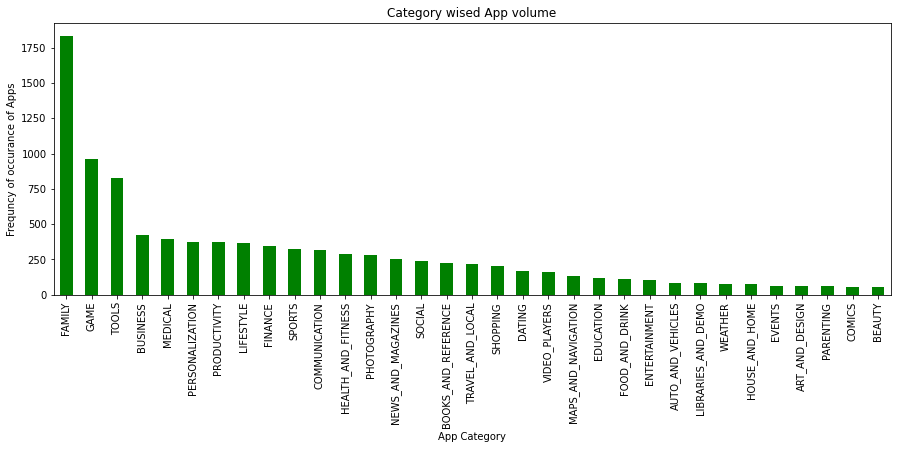

In [77]:
plt.rcParams['figure.figsize']=(15,5)
category_wise_App_volume.plot(kind='bar',color='green')
plt.title('Category wised App volume')
plt.xlabel('App Category')
plt.ylabel('Frequncy of occurance of Apps');

In PlayStore,Maximum Apps are of Family Categorical followed by Gaming Category.

# Let's find number of total installation of Apps in each category

In [78]:
app_category_install=df.groupby('Category')['Installs'].sum().sort_values(ascending=False)
app_category_install

Category
GAME                   13878924415
COMMUNICATION          11038276251
TOOLS                   8001771915
PRODUCTIVITY            5793091369
SOCIAL                  5487867902
PHOTOGRAPHY             4649147655
FAMILY                  4427941505
VIDEO_PLAYERS           3926902720
TRAVEL_AND_LOCAL        2894887146
NEWS_AND_MAGAZINES      2369217760
ENTERTAINMENT           2113660000
BOOKS_AND_REFERENCE     1665969576
PERSONALIZATION         1532494782
SHOPPING                1400348785
HEALTH_AND_FITNESS      1144022512
SPORTS                  1096474498
BUSINESS                 697164865
LIFESTYLE                503823539
MAPS_AND_NAVIGATION      503281890
FINANCE                  455348734
WEATHER                  361100520
EDUCATION                352952000
FOOD_AND_DRINK           211798751
DATING                   140926107
ART_AND_DESIGN           114338100
HOUSE_AND_HOME            97212461
AUTO_AND_VEHICLES         53130211
LIBRARIES_AND_DEMO        52995910
COMICS     

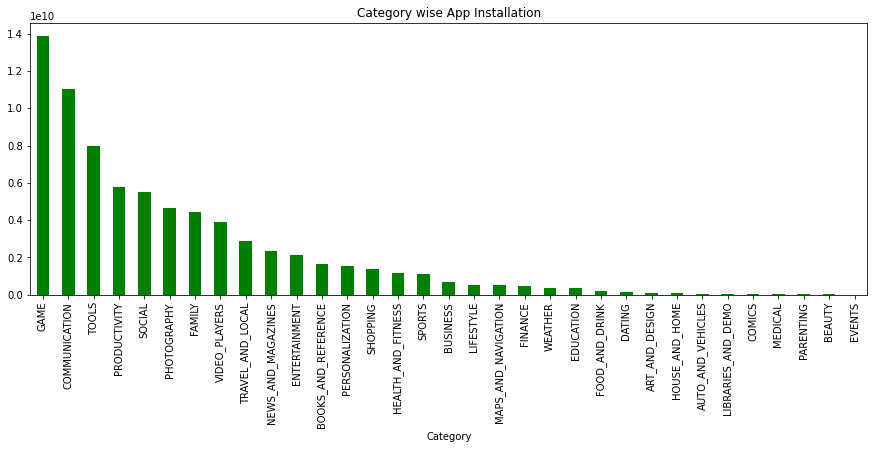

In [79]:
app_category_install.plot(kind='bar',color='g',linewidth=0.3)
plt.title('Category wise App Installation');

Gaming Apps are installed most followed by communication category.

In [80]:
#We can also find total App installation by each Category,as well as each Genre
df.groupby(['Category','Genres'])['Installs'].sum().sort_values(ascending=False)

Category       Genres                      
COMMUNICATION  Communication                   11038276251
TOOLS          Tools                            7991771915
PRODUCTIVITY   Productivity                     5793091369
SOCIAL         Social                           5487867902
PHOTOGRAPHY    Photography                      4649147655
                                                  ...     
FAMILY         Education;Brain Games                  1000
               Books & Reference;Creativity            100
               Board;Pretend Play                      100
               Role Playing;Education                  100
               Trivia;Education                        100
Name: Installs, Length: 145, dtype: int64

The Communication Genre(of Communication Category) has highest numbers of Installation.

# Let's find which category has highest average installation

In [81]:
app_category_avg_install=df.groupby('Category')['Installs'].mean().sort_values(ascending=False)
app_category_avg_install

Category
COMMUNICATION          3.504215e+07
VIDEO_PLAYERS          2.409143e+07
SOCIAL                 2.296179e+07
ENTERTAINMENT          2.072216e+07
PHOTOGRAPHY            1.654501e+07
PRODUCTIVITY           1.548955e+07
GAME                   1.447229e+07
TRAVEL_AND_LOCAL       1.321866e+07
TOOLS                  9.675661e+06
NEWS_AND_MAGAZINES     9.327629e+06
BOOKS_AND_REFERENCE    7.504367e+06
SHOPPING               6.932420e+06
WEATHER                4.570893e+06
PERSONALIZATION        4.075784e+06
HEALTH_AND_FITNESS     3.972300e+06
MAPS_AND_NAVIGATION    3.841846e+06
SPORTS                 3.373768e+06
EDUCATION              2.965983e+06
FAMILY                 2.416999e+06
FOOD_AND_DRINK         1.891060e+06
ART_AND_DESIGN         1.786533e+06
BUSINESS               1.659916e+06
LIFESTYLE              1.365375e+06
FINANCE                1.319851e+06
HOUSE_AND_HOME         1.313682e+06
DATING                 8.241293e+05
COMICS                 8.032348e+05
LIBRARIES_AND_DEMO 

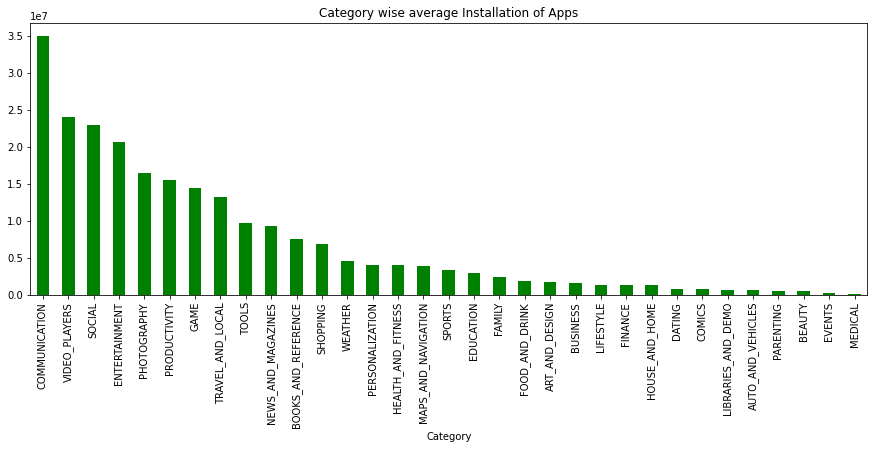

In [82]:
app_category_avg_install.plot(kind='bar',color='g',linewidth=0.3)
plt.title('Category wise average Installation of Apps');

Mostly Communication Apps are making users ready to install.



# Let's find which categories are ratted high

In [83]:
app_category_rating=df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
app_category_rating

Category
EDUCATION              4.362800
EVENTS                 4.357682
ART_AND_DESIGN         4.348746
BOOKS_AND_REFERENCE    4.303972
PERSONALIZATION        4.299237
PARENTING              4.278874
BEAUTY                 4.256711
GAME                   4.243736
WEATHER                4.236870
SOCIAL                 4.236137
HEALTH_AND_FITNESS     4.232370
SHOPPING               4.223819
SPORTS                 4.207572
AUTO_AND_VEHICLES      4.187987
PRODUCTIVITY           4.181408
COMICS                 4.181187
FAMILY                 4.178879
LIBRARIES_AND_DEMO     4.176963
FOOD_AND_DRINK         4.172485
MEDICAL                4.168330
PHOTOGRAPHY            4.158428
HOUSE_AND_HOME         4.153769
ENTERTAINMENT          4.135294
NEWS_AND_MAGAZINES     4.131741
COMMUNICATION          4.131179
BUSINESS               4.126427
FINANCE                4.122752
LIFESTYLE              4.108077
TRAVEL_AND_LOCAL       4.084675
TOOLS                  4.057175
VIDEO_PLAYERS          4.056433

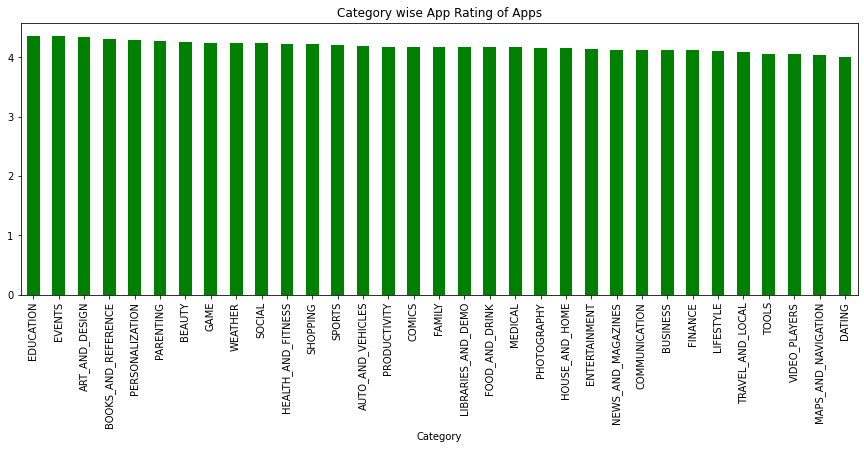

In [84]:
app_category_rating.plot(kind='bar',color='g',linewidth=0.3)
plt.title('Category wise App Rating of Apps');

All the Category has average App rating of more than 4.Educational Apps have the highest rating in Play Store.